In [161]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
from scipy import stats 
import math

In [4]:
# SPARCS data 
sparcs_df_14 = pd.read_csv("NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2014.csv")
sparcs_df_13 = pd.read_csv("NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2013.csv")
sparcs_df_12 = pd.read_csv("NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2012.csv")
sparcs_df_11 = pd.read_csv("NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2011.csv")
sparcs_df_10 = pd.read_csv("NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2010.csv")
sparcs_df_09 = pd.read_csv("NYSDOH_Hospital_Inpatient_Discharges_SPARCS_De-Identified_2009.csv")

#merge years into one large data set
frames = [sparcs_df_14, sparcs_df_13, sparcs_df_12, sparcs_df_11, sparcs_df_10, sparcs_df_09]
sparcs_df = pd.concat(frames)

# delete loaded spreadsheets to free up space
del sparcs_df_14
del sparcs_df_13
del sparcs_df_12
del sparcs_df_11
del sparcs_df_10
del sparcs_df_09
del frames

# save merged data file so don't have to do this again...
sparcs_df.to_csv("merged_data.csv")

In [3]:
# More data prep
sparcs_df = pd.read_csv("merged_data.csv")

# define columns to drop
cols_to_drop = ['APR DRG Code', 'APR MDC Code',
       'APR MDC Description', 'APR Medical Surgical Description',
       'APR Severity of Illness Description', 'Abortion Edit Indicator',
       'Attending Provider License Number', 'Birth Weight',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code','Emergency Department Indicator',
       'Operating Certificate Number', 'Operating Provider License Number',
       'Other Provider License Number','Payment Typology 2', 'Payment Typology 3',
       'Permanent Facility Id']

# delete columns that aren't used to speed up analysis
for col in cols_to_drop: 
    sparcs_df.drop(col, 1, inplace=True)
    
# save filtered one so you don't have to do this again
sparcs_df.to_csv("filtered_merged_data.csv")

In [9]:
# Start here for any repeat
sparcs_df = pd.read_csv("filtered_merged_data.csv")

In [10]:
# df w/ procedure names w/  counts to find quantify number of caths
proc_df = sparcs_df.groupby("CCS Procedure Description").size().sort_values(
    ascending=False).reset_index(
    name="procedure counts")

# CSV of procedure names w/ counts
proc_df.to_csv("procedure_counts.csv")

In [11]:
# top 20 most common procedures
proc_df.head(20)

,CCS Procedure Description,procedure counts
0,NO PROC,3822703
1,OTHER THERAPEUTIC PRCS,956934
2,CESAREAN SECTION,476255
3,PROPHYLACTIC VAC/INOCUL,447588
4,ALCO/DRUG REHAB/DETOX,415835
5,OT PRCS TO ASSIST DELIV,410972
6,RESP INTUB/MECH VENTIL,404932
7,REPAIR CUR OBS LACERATN,331283
8,CIRCUMCISION,313236
9,OPHTHALM-/OT-OLOGIC DX,309593


# Procedures of interest:
DX CARDIAC CATHETERIZTN = 180058


PERC TRANSLUM COR ANGIO = 206731


In [12]:
# df of all indivitual caths performed
cath_df = sparcs_df[(sparcs_df["CCS Procedure Description"].str.upper() == "DX CARDIAC CATHETERIZTN") |
                   (sparcs_df["CCS Procedure Description"].str.upper() == "PERC TRANSLUM COR ANGIO")]

In [112]:
# upper case columns for more accurate classification
cath_df["APR DRG Description"] = cath_df["APR DRG Description"].str.upper()
cath_df["Facility Name"] = cath_df["Facility Name"].str.upper()
cath_df["Patient Disposition"] = cath_df["Patient Disposition"].str.upper()

C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [113]:
# df of cath counts per diagnosis
dx_cath_df = cath_df.groupby("APR DRG Description").size().sort_values(
    ascending=False).reset_index(
    name="cath counts per dx")

# CSV of cath counts per diagnosis
dx_cath_df.to_csv("cath_counts_per_dx.csv")

In [114]:
# cath counts per dx - top 15
dx_cath_df.head(15)

,APR DRG Description,cath counts per dx
0,PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI,87866
1,PERCUTANEOUS CORONARY INTERVENTION W/O AMI,49533
2,CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DIS...,46292
3,PERCUTANEOUS CORONARY INTERVENTION W AMI,38496
4,PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI,34982
5,CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY...,33321
6,ACUTE MYOCARDIAL INFARCTION,29885
7,CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCH...,23963
8,CARDIAC CATHETERIZATION FOR CORONARY ARTERY DI...,23654
9,MODERATELY EXTENSIVE PROCEDURE UNRELATED TO PR...,1851


# Procedures of interest

PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI

PERCUTANEOUS CORONARY INTERVENTION W/O AMI

CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE

PERCUTANEOUS CORONARY INTERVENTION W AMI

PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI

ACUTE MYOCARDIAL INFARCTION

CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHEMIC HEART DISEASE

CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE

*****************

Exclude: 
CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY CONDITIONS

In [115]:
# Dx of CAD
CAD_dx_list = ["PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI",
"PERCUTANEOUS CORONARY INTERVENTION W/O AMI",
"CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE",
"PERCUTANEOUS CORONARY INTERVENTION W AMI",
"PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI",
#"CARDIAC CATHETERIZATION FOR OTHER NON-CORONARY CONDITIONS",
"ACUTE MYOCARDIAL INFARCTION",
"CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHEMIC HEART DISEASE",
"CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE"]

# subset of dataset where caths were done for CAD; dataset of interest for our analysis
CAD_cath_df = cath_df[cath_df["APR DRG Description"].isin(CAD_dx_list)]

In [116]:
# df of hospitals that did caths for CAD diagnoses
hospital_df = pd.DataFrame(CAD_cath_df["Facility Name"].unique())
hospital_df = hospital_df.rename(columns={0 : "hospitals"}).sort_values(by="hospitals").reset_index(drop=True)

# save to CSV file
hospital_df.to_csv("hospital_list.csv")

In [117]:
# caths_per_site_df
caths_per_site_df = CAD_cath_df.groupby("Facility Name").size().sort_values(
    ascending=False).reset_index(
    name="cath counts per hosp")

# store in CSV file
caths_per_site_df.to_csv('caths_per_hospital.csv')

In [118]:
# number of caths done per hospital
caths_per_site_df.head(20)

,Facility Name,cath counts per hosp
0,MOUNT SINAI HOSPITAL,20214
1,NEW YORK PRESBYTERIAN HOSPITAL - COLUMBIA PRES...,18173
2,ST FRANCIS HOSPITAL,17114
3,LONG ISLAND JEWISH MEDICAL CENTER,13191
4,LENOX HILL HOSPITAL,13047
5,NORTH SHORE UNIVERSITY HOSPITAL,12597
6,ST JOSEPHS HOSPITAL HEALTH CENTER,10334
7,NEW YORK PRESBYTERIAN HOSPITAL - NEW YORK WEIL...,10263
8,ROCHESTER GENERAL HOSPITAL,9955
9,UNIVERSITY HOSPITAL,9652


In [119]:
# import fellow sites 
fellow_sites_df = pd.read_csv("fellowship_locations.csv")

In [120]:
# Get array of fellow sites, cast as str type, make it upper case for matching
fellow_sites = fellow_sites_df[fellow_sites_df['Fellows'] == 1]['Hospitals'].values
fellow_sites = np.char.upper(fellow_sites.astype(str))

In [121]:
# helper function for labeling facilities as fellowship training sites 
def fellow_site_generator(df):
    if df["Facility Name"] in fellow_sites:
        return True
    else: 
        return False

# add column to each entry indicating whether happened at institution where fellows work
CAD_cath_df['Fellows'] = CAD_cath_df.apply(fellow_site_generator, axis=1)

C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [122]:
# helper column for counts
CAD_cath_df['counts'] = CAD_cath_df.apply(lambda x: 1, axis=1)

C:\Users\samko\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [123]:
# clean CAD_cath_df
CAD_cath_df = CAD_cath_df.reset_index().drop(['index', 'Unnamed: 0'], 1)

# need to remove instances where LOS > 120 days; complicates analysis...
# this is too bad becaue they were interesting visits
# list of 18 occurances where it happened
LOS_too_long = CAD_cath_df[CAD_cath_df['Length of Stay'] == "120 +"]

# update df to remove those instances
CAD_cath_df = CAD_cath_df[CAD_cath_df['Length of Stay'] != "120 +"]
CAD_cath_df['Length of Stay'] = CAD_cath_df['Length of Stay'].values.astype(int)

# helper function for converting strings to floats for total cost
def make_float(x):
    if type(x) == str:
        x = float(x.replace(",",""))
    return x

# make strings floats in cost column
CAD_cath_df['Total Costs'] = CAD_cath_df['Total Costs'].apply(make_float)

In [124]:
# make a fellows and non_fellows separate df's
fellows_df = CAD_cath_df[CAD_cath_df["Fellows"] == True]
non_fellows_df = CAD_cath_df[CAD_cath_df["Fellows"] == False]

In [125]:
# table showing number of caths per diagnosis depending on whether fellow site or non-fellow site
count_table = pd.pivot_table(CAD_cath_df,
                            values="counts", 
                             index='APR DRG Description',
                              columns="Fellows",
                              aggfunc=np.sum)
count_table

Fellows,False,True
APR DRG Description,,
ACUTE MYOCARDIAL INFARCTION,13746,16138
CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE,8810,14836
CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE,19777,26514
CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHEMIC HEART DISEASE,9399,14562
PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI,13936,21044
PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI,19153,68712
PERCUTANEOUS CORONARY INTERVENTION W AMI,15975,22519
PERCUTANEOUS CORONARY INTERVENTION W/O AMI,10116,39416


In [126]:
def stat_generator(df, outcome):
    
    outcome_df = pd.DataFrame(columns=['count', 
                                     'mean',
                                       'median',
                                     'std',
                                     'max', 
                                     'min'])
    
    for status in df['Fellows'].unique():
        series = df[df['Fellows'] == status][outcome]
        count = len(series)
        avg = series.mean()
        median = series.median()
        std = series.std()
        max_outcome = series.max()
        min_outcome = series.min()
        if status == True:
            outcome_df.loc[outcome + " w/ Fellows", :] = count, avg, median, std, max_outcome, min_outcome
        else: 
            outcome_df.loc[outcome + " w/o Fellows", :] = count, avg, median, std, max_outcome, min_outcome
    return outcome_df
        

In [127]:
stat_generator(CAD_cath_df, 'Length of Stay')

,count,mean,median,std,max,min
Length of Stay w/o Fellows,110912,3.29521,2,3.30057,103,1
Length of Stay w/ Fellows,223741,3.2333,2,4.08412,117,1


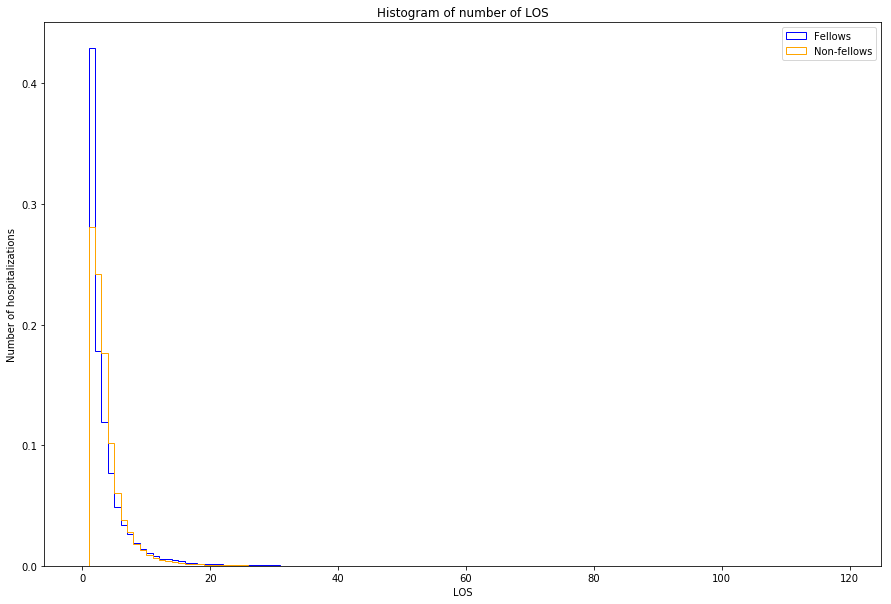

In [128]:
# Normed histogram of LOS by fellow vs non-fellow institutions
bins = np.arange(0, 120, 1)
plt.figure(1, figsize=(15,10))
plt.hist(fellows_df["Length of Stay"], bins=bins, histtype='step', label="Fellows", color='blue', normed=True)
plt.hist(non_fellows_df["Length of Stay"], bins=bins, histtype='step', label="Non-fellows", color='orange', normed=True)
plt.xlabel("LOS")
plt.ylabel("Number of hospitalizations")
plt.title("Histogram of number of LOS")
plt.legend()
plt.show()

In [131]:
stat_generator(CAD_cath_df, "Total Costs").to_csv('all_dx_total_costs.csv')
stat_generator(CAD_cath_df, "Total Costs")

,count,mean,median,std,max,min
Total Costs w/o Fellows,110912,13165.7,11114.6,9642.6,221728,0.29
Total Costs w/ Fellows,223741,16918.3,13136.2,16078.5,803085,770.27


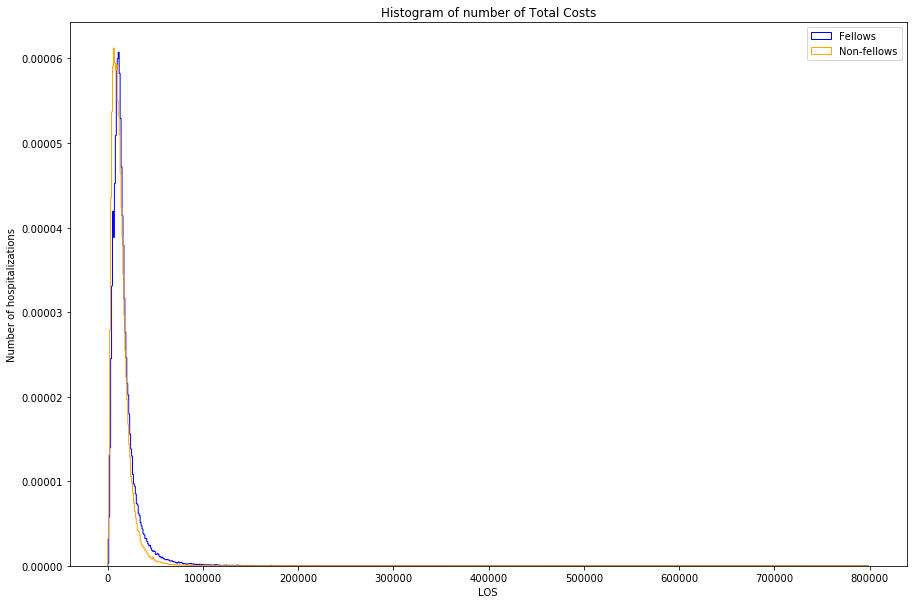

In [132]:
# Normed histogram of LOS by fellow vs non-fellow institutions
bins = np.arange(0, 800000, 1000)
plt.figure(1, figsize=(15,10))
plt.hist(fellows_df["Total Costs"], bins=bins,histtype='step', label="Fellows", color='blue', normed=True)
plt.hist(non_fellows_df["Total Costs"], bins=bins, histtype='step', label="Non-fellows", color='orange', normed=True)
plt.xlabel("LOS")
plt.ylabel("Number of hospitalizations")
plt.title("Histogram of number of Total Costs")
plt.legend()
plt.show()

Want to get length of stay
    * average
    * std
    * max
    * min
    * median
    * histogram
    * normally distributed?
    
Want to get total charges
    * avg
    * std
    * max
    * min
    * histogram
    * normally distributed?
    
Death rates
    * stratify off of severity of illness
    * emergent / urgent 


In [86]:
# table of the num of caths done for each dx at fellow vs. non-fellow sites
count_table = pd.pivot_table(CAD_cath_df,
                            values="counts", 
                             index='APR DRG Description',
                              columns="Fellows",
                              aggfunc=np.sum)
count_table

Fellows,False,True
APR DRG Description,,
ACUTE MYOCARDIAL INFARCTION,13746,16138
CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE,8810,14836
CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE,19777,26514
CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHEMIC HEART DISEASE,9399,14562
PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI,13936,21044
PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI,19153,68712
PERCUTANEOUS CORONARY INTERVENTION W AMI,15975,22519
PERCUTANEOUS CORONARY INTERVENTION W/O AMI,10116,39416


In [87]:
#Average illness severity for each diangosis by fellow vs. non-fellow site
illness_severity = pd.pivot_table(CAD_cath_df, 
                               values="APR Severity of Illness Code",
                               index='APR DRG Description',
                              columns="Fellows",
                              aggfunc=np.mean)
illness_severity

Fellows,False,True
APR DRG Description,,
ACUTE MYOCARDIAL INFARCTION,2.160920,2.273206
CARDIAC CATHETERIZATION FOR CORONARY ARTERY DISEASE,2.513280,2.596792
CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE,1.660768,1.680395
CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHEMIC HEART DISEASE,2.462496,2.598132
PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI,1.834458,1.961842
PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI,1.662351,1.623908
PERCUTANEOUS CORONARY INTERVENTION W AMI,1.874429,2.005373
PERCUTANEOUS CORONARY INTERVENTION W/O AMI,1.802392,1.680105


In [88]:
CAD_cath_df.groupby('Fellows').count()
total_fellow = 223753
total_no_fellows = 110918

In [90]:
# make list of tuples of dx and summary stat df's for both los and cost
los_df_lst = []
cost_df_lst =[]
for dx in CAD_dx_list:
    dx_df = CAD_cath_df[CAD_cath_df["APR DRG Description"] == dx]
    los = stat_generator(dx_df, 'Length of Stay')
    cost = stat_generator(dx_df, 'Total Costs')
    los_df_lst.append((dx, los))
    cost_df_lst.append((dx, cost))
    

In [91]:
# some print outs of LOS for fellow sites vs non-fellow sites per dx
for x in los_df_lst:
    print(x[0])
    print()
    print(x[1])
    print()
    print()

PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI

                            count     mean median      std max min
Length of Stay w/ Fellows   68712  1.87458      1  2.38622  67   1
Length of Stay w/o Fellows  19153  2.13147      1  2.32336  59   1


PERCUTANEOUS CORONARY INTERVENTION W/O AMI

                            count     mean median      std max min
Length of Stay w/o Fellows  10116  2.71679      2  2.91565  58   1
Length of Stay w/ Fellows   39416  2.15793      1   2.7559  84   1


CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE

                            count     mean median      std max min
Length of Stay w/o Fellows  19777  2.74501      2  2.60505  83   1
Length of Stay w/ Fellows   26514  2.61243      2  2.46422  54   1


PERCUTANEOUS CORONARY INTERVENTION W AMI

                            count     mean median      std max min
Length of Stay w/o Fellows  15975  3.27036      3  2.93613  66   1
Length of Stay w/ Fellows   22519  3.97606      3  4.10441  90   1


PE

In [431]:
# some print outs for total costs in fellow sites vs non-fellow sites per dx
for x in cost_df_lst:
    print(x[0])
    print()
    print(x[1])
    print()
    print()

PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI

                         count     mean   median      std     max     min
Total Costs w/ Fellows   68712  15295.8  12631.5  11225.7  323236  890.36
Total Costs w/o Fellows  19153    14681  13025.8  8048.54  114312  539.11


PERCUTANEOUS CORONARY INTERVENTION W/O AMI

                         count     mean   median      std     max     min
Total Costs w/o Fellows  10116  16051.3    13941  9689.18  153810   48.77
Total Costs w/ Fellows   39416  16226.3  13888.9  11197.1  446183  770.27


CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE

                         count     mean   median      std     max     min
Total Costs w/o Fellows  19777  7358.78   5865.1  5545.72  125318  559.01
Total Costs w/ Fellows   26514  9200.97  6769.68  10043.3  434859  829.36


PERCUTANEOUS CORONARY INTERVENTION W AMI

                         count     mean   median      std     max      min
Total Costs w/o Fellows  15975  17899.7  15450.9    10739  219593  

In [430]:
CAD_cath_df.groupby(["Fellows", "APR DRG Description"]).agg({
    "APR Severity of Illness Code" : np.mean,
})

APR Severity of Illness Code
Fellows APR DRG Description                                                             
False   ACUTE MYOCARDIAL INFARCTION                                             2.160920
        CARDIAC CATHETERIZATION FOR CORONARY ARTERY DIS...                      2.513280
        CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE                      1.660768
        CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHE...                      2.462496
        PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI                            1.834458
        PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI                          1.662351
        PERCUTANEOUS CORONARY INTERVENTION W AMI                                1.874429
        PERCUTANEOUS CORONARY INTERVENTION W/O AMI                              1.802392
True    ACUTE MYOCARDIAL INFARCTION                                             2.273206
        CARDIAC CATHETERIZATION FOR CORONARY ARTERY DIS...                      2.596792
        CARDIAC CATHETERIZATION FOR ISCHEMIC HEART DISEASE                      1.680395
        CARDIAC CATHETERIZATION W CIRC DISORD EXC ISCHE...                      2.598132
        PERCUTANEOUS CARDIOVASCULAR PROCEDURES W AMI                            1.961842
        PERCUTANEOUS CARDIOVASCULAR PROCEDURES W/O AMI                          1.623908
        PERCUTANEOUS CORONARY INTERVENTION W AMI                                2.005373
        PERCUTANEOUS CORONARY INTERVENTION W/O AMI                              1.680105

In [174]:
severity_df = pd.DataFrame(columns=["severity_count", "total", "percentage"])
sev_totals = CAD_cath_df.groupby('Fellows')['counts'].sum().values

death_rate_df = pd.DataFrame(columns=['num_deaths','total_discharges','death_rate', 'sev_rate'])
gb = CAD_cath_df.groupby(["Fellows", 'APR Severity of Illness Code'])

idx = 0
for k, gp in gb:
    sev_total = sev_totals[math.floor(idx/4)]
    deaths = gp[gp['Patient Disposition'] == 'EXPIRED'].shape[0]
    total_dcs = int(gp.shape[0])
    death_rate = deaths / total_dcs
    sev_rate = total_dcs / sev_total
    if k[0] == False:
        k = "Non-fellow, severity index " + str(k[1])
    else:
        k = "Fellow, severity index " + str(k[1])
    death_rate_df.loc[str(k), :] = deaths, total_dcs, death_rate, sev_rate
    idx += 1
    
death_rate_df

,num_deaths,total_discharges,death_rate,sev_rate
"Non-fellow, severity index 1",13,40744,0.000319065,0.367354
"Non-fellow, severity index 2",60,42190,0.00142214,0.380392
"Non-fellow, severity index 3",214,23619,0.0090605,0.212953
"Non-fellow, severity index 4",460,4359,0.105529,0.0393014
"Fellow, severity index 1",11,88684,0.000124036,0.396369
"Fellow, severity index 2",78,80842,0.000964845,0.36132
"Fellow, severity index 3",331,45380,0.00729396,0.202824
"Fellow, severity index 4",1042,8835,0.11794,0.0394876
